# **Importing needed Libraries**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
import warnings
warnings.filterwarnings("ignore") # ignore warnings 

2024-06-16 16:52:49.573822: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 16:52:49.573983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 16:52:49.723164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Reading data file**

In [2]:
# Set the paths to the train and test directories
train_dir = '/kaggle/input/cat-and-dog/training_set/training_set'
val_dir = '/kaggle/input/cat-and-dog/test_set/test_set'

# Set the image size and batch size
img_size = (224, 224)
batch_size = 32

# Create the image data generators for train and test data
#The rescale=1./255 parameter is used to normalize the pixel values of the images to the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the train and test data
train_generator = train_datagen.flow_from_directory(train_dir,target_size=img_size,batch_size=batch_size,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir,target_size=img_size,batch_size=batch_size,class_mode='binary')

# Print the number of samples in the train and test sets
print(f'Number of train samples: {train_generator.n}')
print(f'Number of validation samples: {val_generator.n}')

# Print the class indices
print(f'Class indices: {train_generator.class_indices}')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Number of train samples: 8005
Number of validation samples: 2023
Class indices: {'cats': 0, 'dogs': 1}


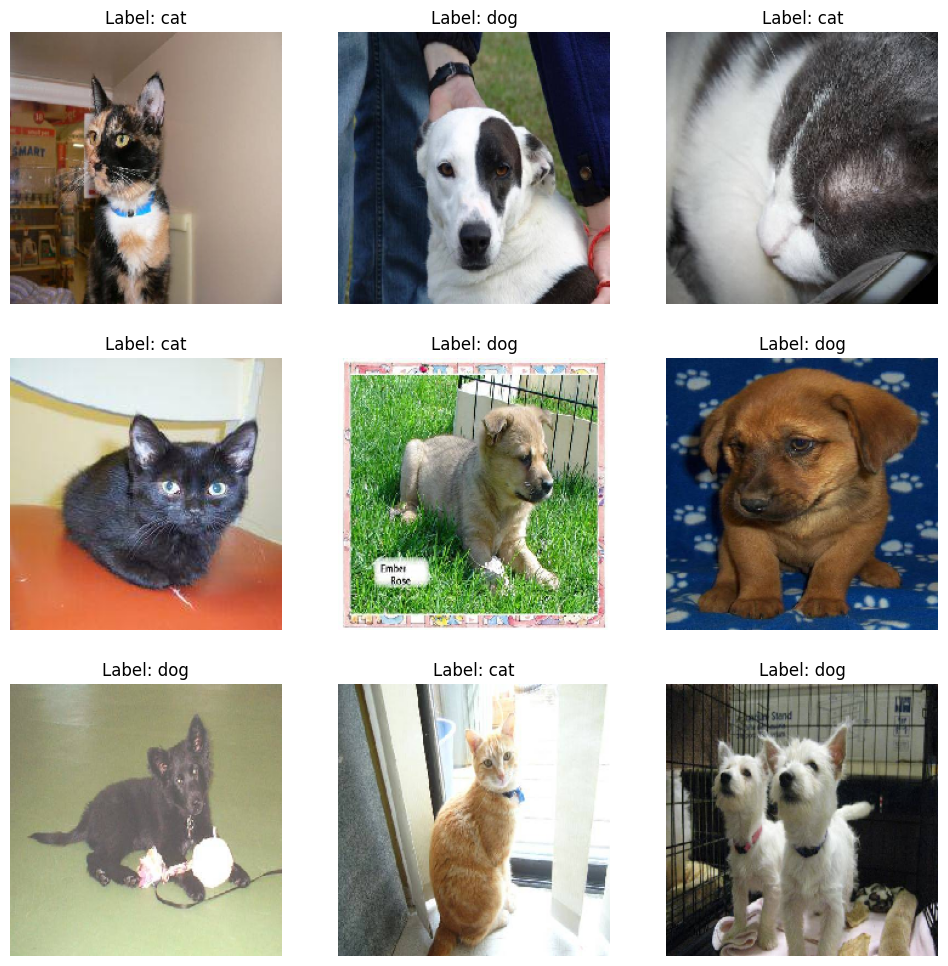

In [3]:
# Get a batch of images and labels from the train generator
images, labels = next(train_generator)

# Display the images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    # Determine the class label for the current image
    if labels[i] == 0:
        plt.title('Label: cat')
    else:
        plt.title('Label: dog')
    plt.axis('off')
plt.show()

# **Building CNN model**

In [4]:
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Compile CNN Model**

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train CNN Model**

In [7]:
epochs = 12
model.fit(train_generator,epochs=epochs,validation_data=val_generator,verbose=1)

Epoch 1/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.5348 - loss: 0.7148 - val_accuracy: 0.6565 - val_loss: 0.6180
Epoch 2/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.6492 - loss: 0.6267 - val_accuracy: 0.7069 - val_loss: 0.5718
Epoch 3/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.7224 - loss: 0.5488 - val_accuracy: 0.7029 - val_loss: 0.5821
Epoch 4/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.7670 - loss: 0.4924 - val_accuracy: 0.7410 - val_loss: 0.5248
Epoch 5/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.8097 - loss: 0.4217 - val_accuracy: 0.7622 - val_loss: 0.4965
Epoch 6/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.8513 - loss: 0.3390 - val_accuracy: 0.7444 - val_loss: 0.5630
Epoch 7/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.8918 - loss: 0.2615 - val_accuracy: 0.7519 - val_loss: 0.5878
Epoch 8/12
251/251 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.9358 - loss: 0.1647 - val_accu